# Hessain

### Import library and setup dependency

#### Universal library

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3 decimal places, no scientific notation
np.set_printoptions(precision=3, suppress=True)

#### Customize library

In [59]:
import os
import sys

# Set project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ''))
sys.path.append(project_root)

print(f"current: {os.getcwd()}")
print(f"root   : {project_root}")

current: c:\Users\BTCOM\Desktop\0_Project\DeepLearning\hessian-optimizer-comparison
root   : c:\Users\BTCOM\Desktop\0_Project\DeepLearning\hessian-optimizer-comparison


In [60]:
from custom_library.utils import dataUtils
import custom_library.models as my_models

# Set autoreload for external modules change
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Explicit GD

#### Setup LR models class

In [ ]:
model = my_models.ExplicitLrModel()

test


In [ ]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

In [95]:
model.total_params()

2161

#### Load dataset

In [96]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,3)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = dataUtils.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


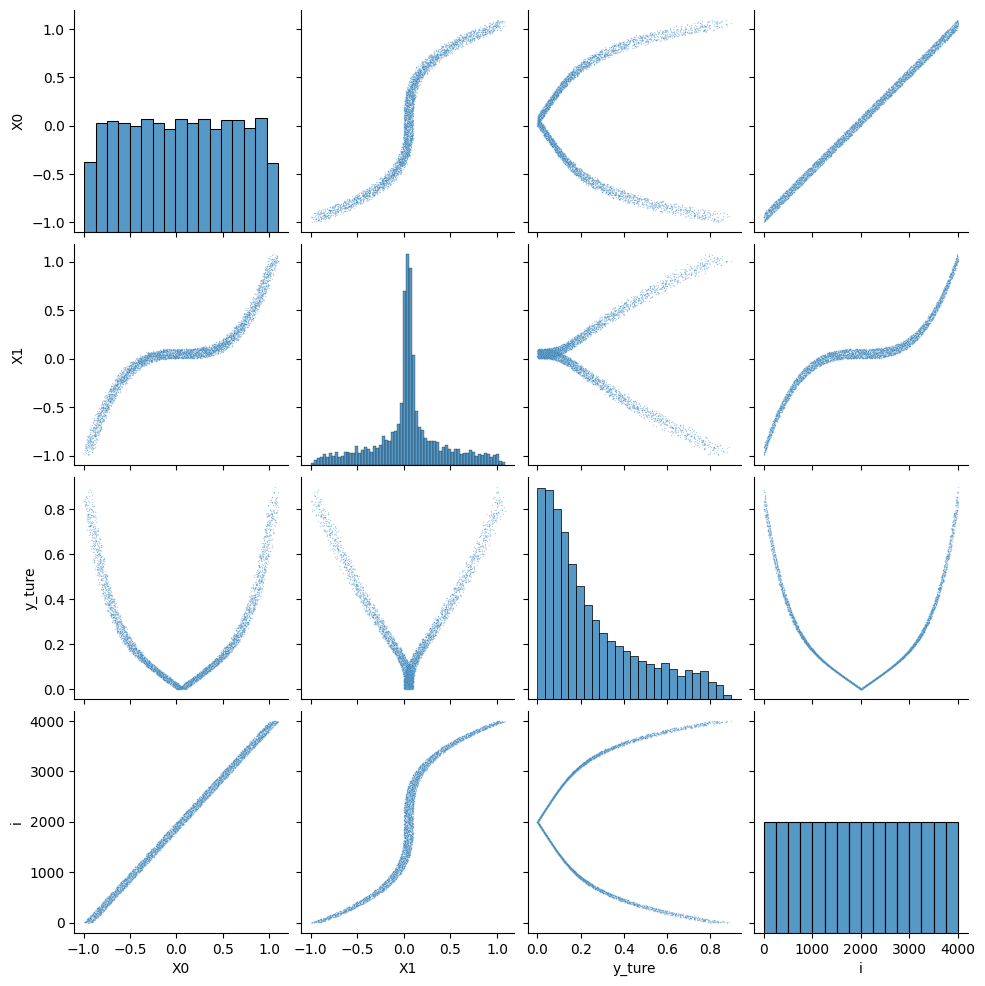

In [97]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

#### Train Model

In [ ]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=5, batch_size=256, learning_rate=0.0001)

Epoch 1/5 [=........................]
loss: nan, val_loss: nan

Epoch 2/5 [======...................]
loss: nan, val_loss: nan

Epoch 3/5 [===========..............]
loss: nan, val_loss: nan

Epoch 4/5 [================.........]
loss: nan, val_loss: nan

Epoch 5/5 [=====================....]
loss: nan, val_loss: nan

best-loss: 0.0144


#### Evaluate Model

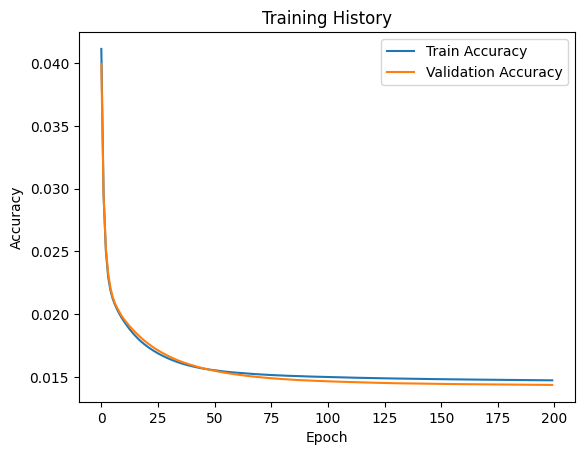

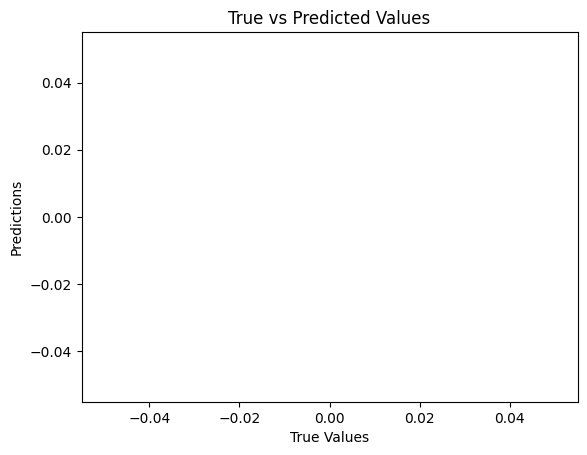

In [113]:
history.evaluate()

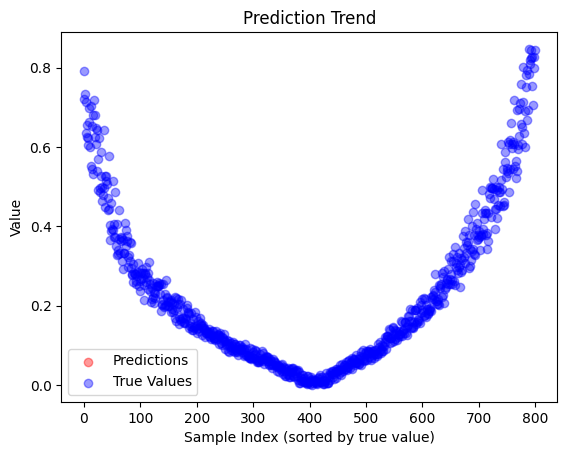

In [114]:
history.display_trend(ref="x", axis=0)

### Implicit GD

#### Setup LR models class

In [546]:
model = my_models.ImplicitLrModel()

test


In [547]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

In [548]:
model.total_params()

2161

#### Load dataset

In [549]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = dataUtils.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


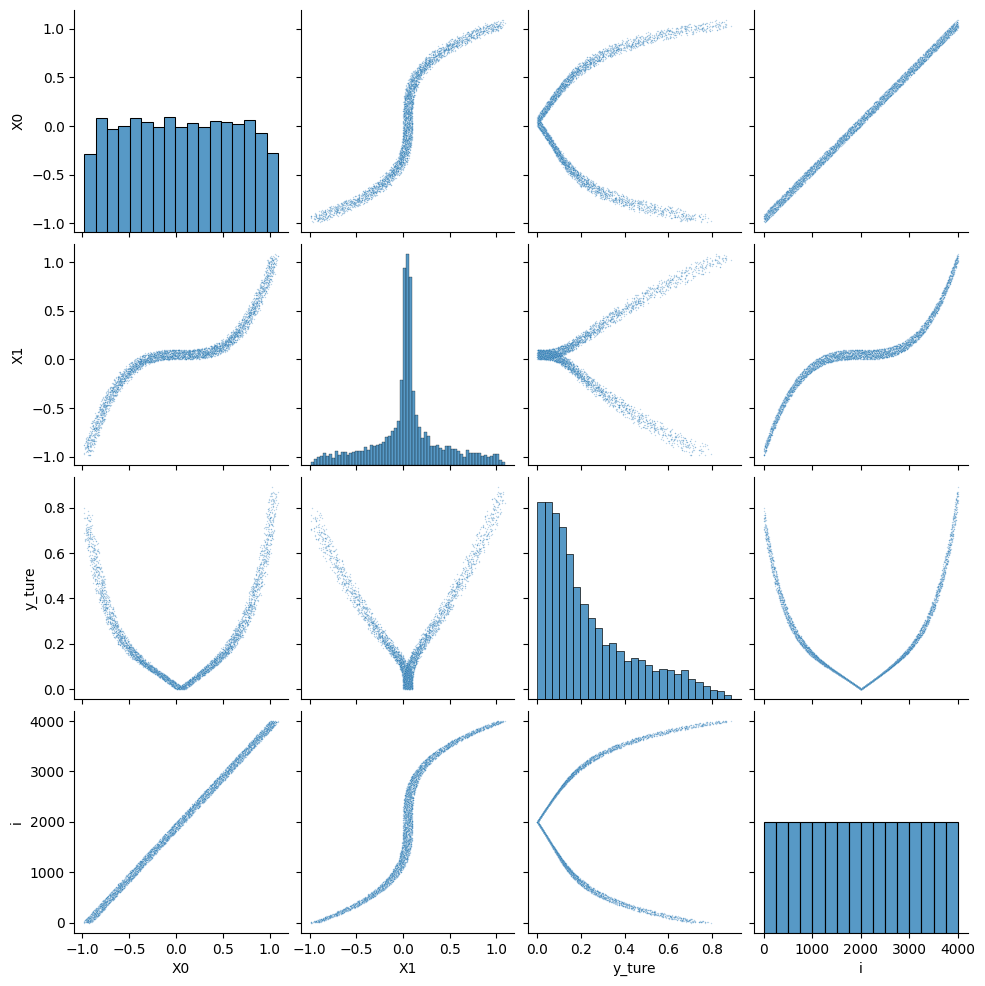

In [550]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

#### Train Model

In [ ]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=10, batch_size=8, learning_rate=0.1)

[nan nan nan ... nan nan nan]
Batch 0/3200: acc: nan, val: nan
[nan nan nan ... nan nan nan]
Batch 8/3200: acc: nan, val: nan
[nan nan nan ... nan nan nan]
Batch 16/3200: acc: nan, val: nan
[nan nan nan ... nan nan nan]
Batch 24/3200: acc: nan, val: nan
[nan nan nan ... nan nan nan]
Batch 32/3200: acc: nan, val: nan


#### Evaluate Model

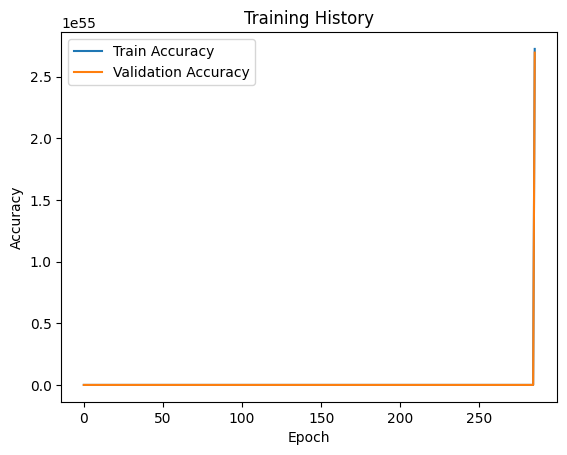

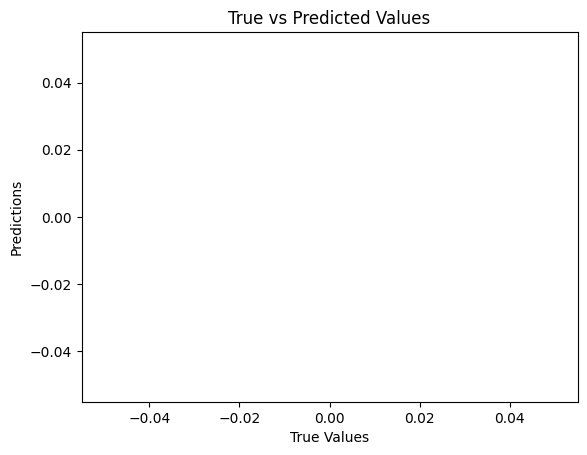

In [ ]:
history = model.getHistory()
history.evaluate()

model.layers

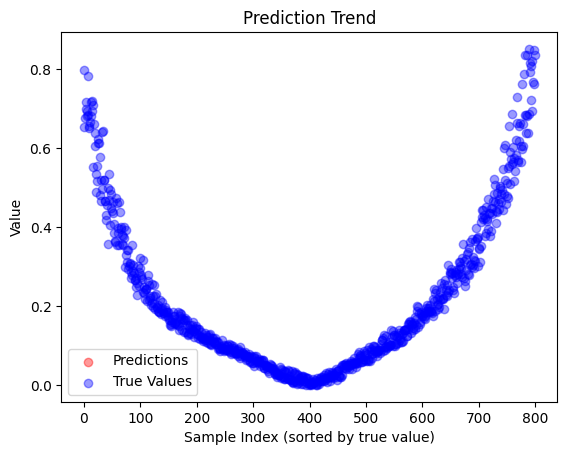

In [555]:
history.display_trend(ref="x", axis=0)

### Newton's GD

#### Setup LR models class

In [147]:
model = my_models.OptimizeNewtonLrModel()

test


In [148]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

In [149]:
model.total_params()

2161

#### Load dataset

In [150]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,3)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = dataUtils.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


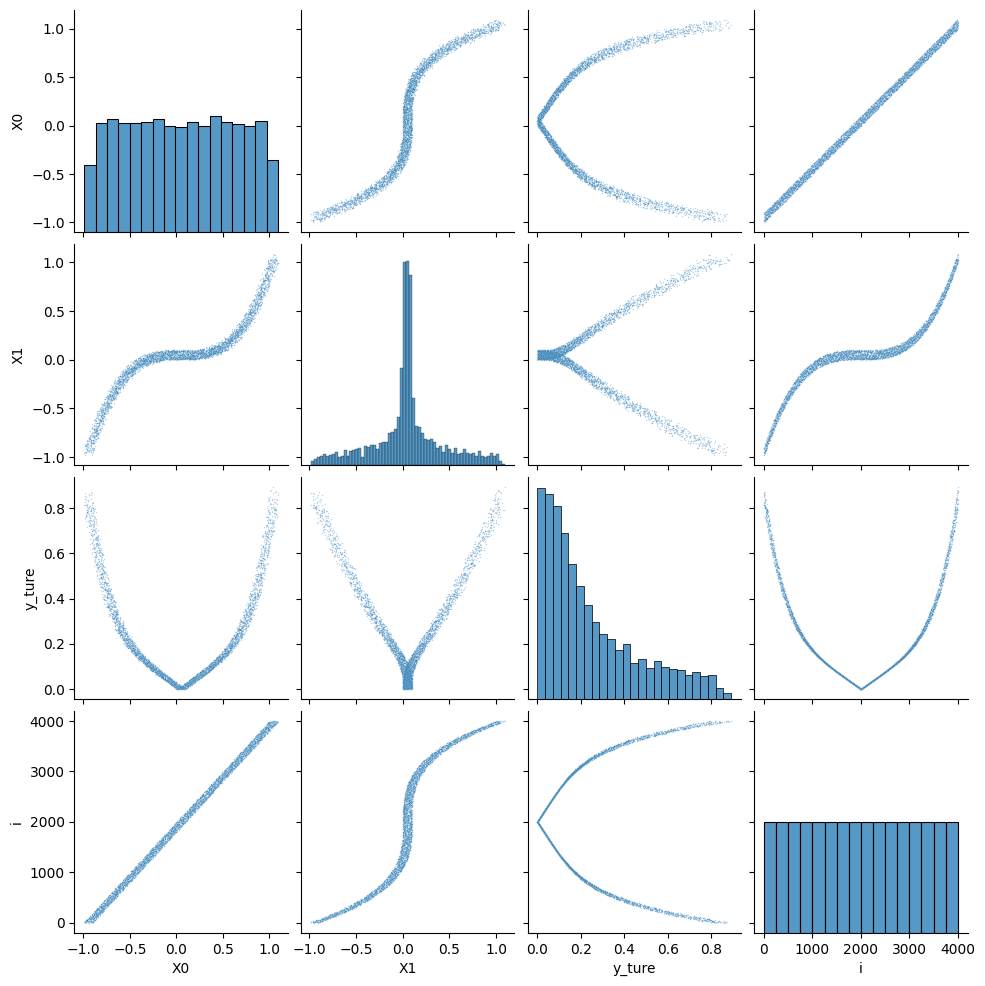

In [151]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

#### Train Model

In [152]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=5, batch_size=256)

Batch 0/3200: acc: 0.11875724478432689, val: 0.11891153523201452
Batch 256/3200: acc: 0.11743964851729981, val: 0.11773147277101083
Batch 512/3200: acc: 0.11636898777443955, val: 0.11664514383651593
Batch 768/3200: acc: 0.11542831343835074, val: 0.11585730950898715
Batch 1024/3200: acc: 0.11076475494119098, val: 0.11124441821026394
Batch 1536/3200: acc: 0.10771895547292436, val: 0.1082398616609393
Batch 1792/3200: acc: 0.10388428646086524, val: 0.10447386879386743
Batch 2048/3200: acc: 0.0998452570691967, val: 0.10028296853336645
Batch 2304/3200: acc: 0.08250752333405216, val: 0.08208399200691584
Batch 2560/3200: acc: 0.0690585849940057, val: 0.06946789295313663
Batch 2816/3200: acc: 0.059956643519601664, val: 0.06000182756495532
Batch 3072/3200: acc: 0.059603009572827076, val: 0.05964713679434144
Epoch 1/5 [=........................]
loss: 0.0596, val_loss: 0.0596

Batch 0/3200: acc: 0.05154771469285909, val: 0.05171395750939833
Batch 256/3200: acc: 0.05192911446767432, val: 0.0520489

#### Evaluate Model

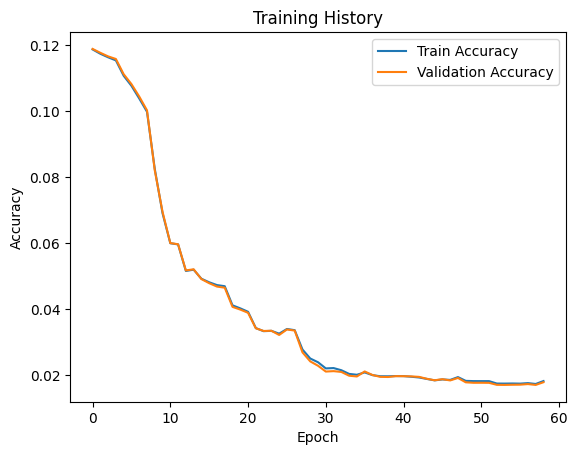

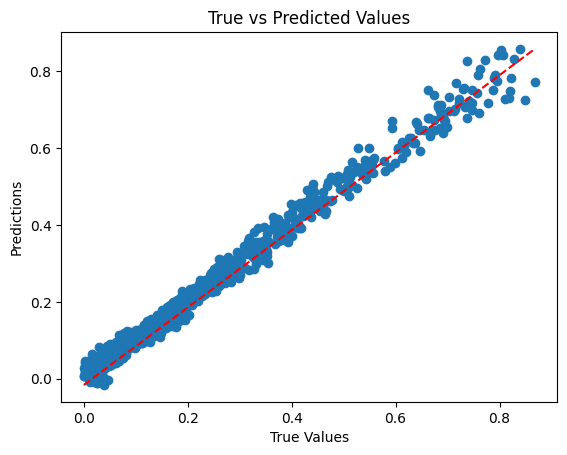

In [153]:
history.evaluate()

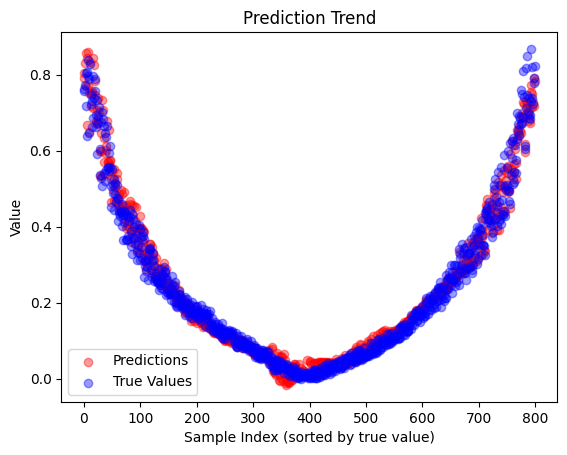

In [154]:
history.display_trend(ref="x", axis=0)